# Graphviz to Graph

## Preparation
### Install the package and add path
Excute `!pip install graphviz`  
Add path `C:\Program Files (x86)\Graphviz2.38\bin` to your enviroment.


In [192]:
from graphviz import Digraph, Source
import numpy as np

## Simple Example

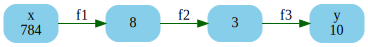

In [180]:
Origin = Digraph('Original')
Origin.attr('node',shape = "Mrecord", color="skyblue",style="filled")
Origin.attr('edge', color="darkgreen")
Origin.attr(rankdir= "LR")
Origin.node('784', "輸入 x\\n784")
Origin.node('8', '8')
Origin.node('3', '3')
Origin.node('10', "輸出 y\\n10")
Origin.edge('784', '8', label='f1')
Origin.edge('8', '3', label='f2')
Origin.edge('3', '10', label='f3')
Origin

### You may notice that
The chinese characters can not be shown.  
We could put a `\` to make it visible.  
Besides, we could change `fontname` in `attr` of node or edge.

## A better example

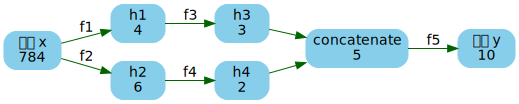

In [181]:
Concat = Digraph('Concatenate')
Concat.attr('node', fontname = "Microsoft YaHei",shape = "Mrecord", color="skyblue",style="filled")
Concat.attr('edge',fontname = "Microsoft YaHei",shape ="Mrecord", color="darkgreen", style="filled")
Concat.attr(rankdir= "LR")
node_name = ['784','4', '6','3','2','5','10']
node_label = ['\輸入 x\\n','h1\\n','h2\\n','h3\\n','h4\\n','concatenate\\n','\輸出 y\\n']
for i in range(len(node_name)):
    Concat.node(node_name[i], node_label[i]+node_name[i])
edge_name = [['784', '4'],
            ['784','6'],
            ['4','3'],
            ['6','2'],
            ['5','10']]
f_name = []
for i in range(1,6):
    f_name.append("f%d" %i)
for i in range(5):
    Concat.edge(edge_name[i][0],edge_name[i][1],label = f_name[i])
Concat.edge('3','5')
Concat.edge('2','5')
Concat

## How about plotting a neuron network digram?
Here is the advantage to plot in Jupyter notebook (with Python)
We could plot node or edge in batches.

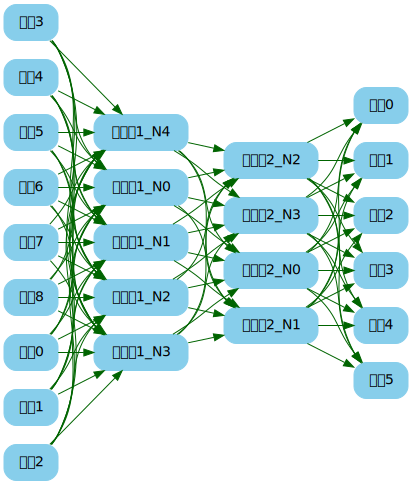

In [141]:
test = Digraph('Test')
test.attr('node', fontname = "Microsoft JhengHei",shape = "Mrecord", color="skyblue",style="filled")
test.attr('edge',fontname = "Microsoft JhengHei", color="darkgreen")
test.attr(rankdir= "LR", rank="source")

layer = ['I', 'H1_','H2_', 'O']
node = [9, 5, 4, 6]
layer_descr = ['\輸入%d','\隱藏層1_N%d','\隱藏層2_N%d','\輸出%d']

for i in range(len(layer)):
    for j in range(node[i]):
        test.node(layer[i]+str(j),layer_descr[i] %j)

edge = [[0,1],[1,2],[2,3]]
for arr in edge:
    for j in range(node[arr[0]]):
        for k in range(node[arr[1]]):
            test.edge(layer[arr[0]]+str(j),layer[arr[1]]+str(k))
            
test

## Cluster (Subgraph)
**Notice** that the name of each subgraph should be addressed with `cluster_`.  
Otherwise, it would not be putted into as a subgraph.

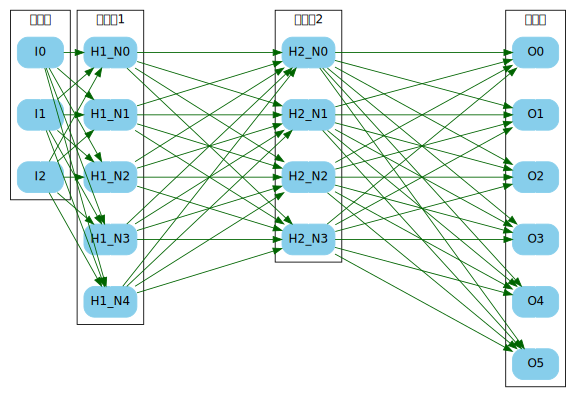

In [147]:
g = Digraph('Test')
g.attr('node', fontname = "Microsoft YaHei",shape = "Mrecord", color="skyblue",style="filled")
g.attr('edge',fontname = "Microsoft YaHei", color="darkgreen")
g.attr(rankdir='TB',splines='line',size='8')

layer = ['I', 'H1_','H2_', 'O']
node = [3, 5, 4, 6]
layer_descr = ['I%d','H1_N%d','H2_N%d','O%d']
layer_label = ['\輸入層','\隱藏層1','\隱藏層2','\輸出層']

for i in range(len(layer)):
    a = Digraph('cluster_'+layer[i])
    for j in range(node[i]):
        a.node(layer[i]+str(j),layer_descr[i] %j)
    for j in range(node[i]-1):
        a.edge(layer[i]+str(j),layer[i]+str(j+1),arrowhead='none',color='white',minlen='1')
    a.attr('graph',label=layer_label[i],fontname = "Microsoft YaHei")
    g.subgraph(a)
edge = [[0,1],[1,2],[2,3]]


for arr in edge:
    for j in range(node[arr[0]]):
        for k in range(node[arr[1]]):
            g.edge(layer[arr[0]]+str(j),layer[arr[1]]+str(k),constraint='false')

g

## A decision tree in Iris classify
### Import necessary packages

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from IPython.display import Image  
from sklearn import tree
import pydotplus

### Load data

In [186]:
iris = load_iris()
X = iris.data
y = iris.target

### Building Model

In [187]:
# Create decision tree classifer object
clf = DecisionTreeClassifier(random_state=0)

# Train model
model = clf.fit(X, y)

### sklearn.tree can output the dot source data

In [229]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names)

print(dot_data)

digraph Tree {
node [shape=box] ;
0 [label="petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor"] ;
2 -> 3 ;
4 [label="petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica"] ;
4 -> 6 ;
7 [label="petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\

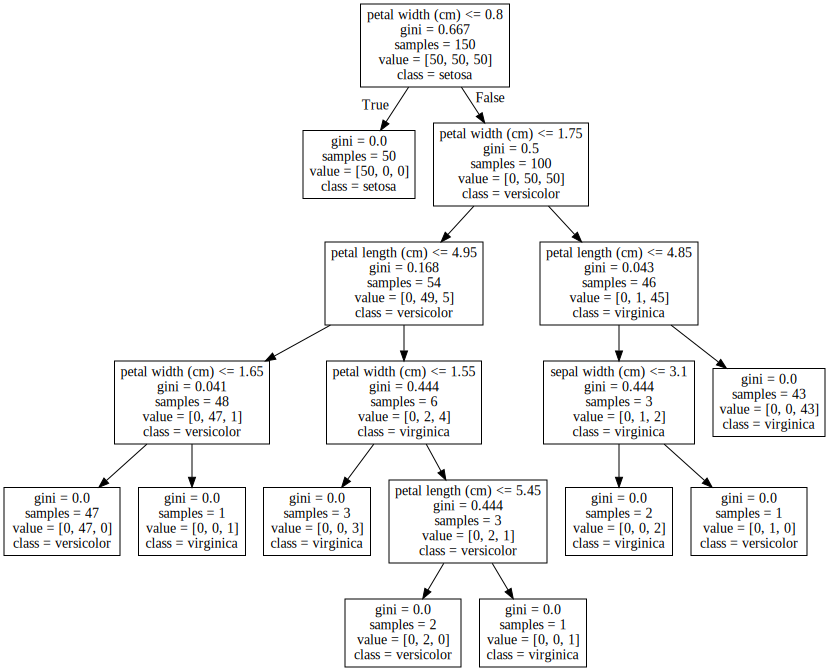

In [230]:
Source(dot_data)

### Modified the source data:
#### Smaller and change the font like we did above

In [240]:
index = dot_data.find('node [shape=box] ;')
size_str = '\nsize="8";\n'
graph_str = 'graph [fontname = "helvetica"];\n'
node_str = 'node [fontname = "helvetica",shape = "Mrecord", color="skyblue",style="filled"];\n'
edge_str = 'edge [fontname = "helvetica",shape ="Mrecord", color="darkgreen", style="filled"];\n'
modified_dot_data = dot_data[:index] + \
                    size_str + \
                    node_str + \
                    node_str + \
                    edge_str + \
                    dot_data[index:]

In [241]:
src = Source(modified_dot_data)

In [242]:
print(modified_dot_data[:400])

digraph Tree {

size="8";
node [fontname = "helvetica",shape = "Mrecord", color="skyblue",style="filled"];
node [fontname = "helvetica",shape = "Mrecord", color="skyblue",style="filled"];
edge [fontname = "helvetica",shape ="Mrecord", color="darkgreen", style="filled"];
node [shape=box] ;
0 [label="petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa"] ;
1 [la


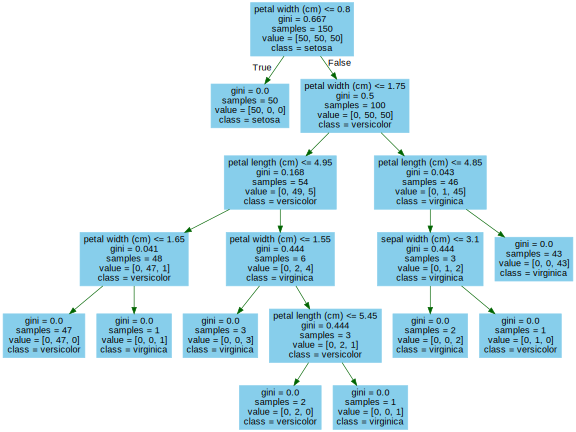

In [243]:
src